# Model 1: Unbiased transmission

Original: https://bookdown.org/amesoudi/ABMtutorial_bookdown/model1.html#model1

## Note
- the simplest possible case of cultural evolution.
- $N$ individuals have two traits, A and B.
- Each generation, the $N$ agents are replaced with $N$ new agents.
- Each new agent picks a member of the previous generation at random and copies their cultural trait.
- This is known as unbiased oblique cultural transmission:
    - unbiased because traits are copied entirely at random,
    - and oblique because one generation learns from the previous non-overlapping generation. 
- We are interested in tracking the proportion of individuals ($p$) who possess trait $A$ over successive generations ($t$).
- These could correspond to biological generations, but could equally be 'cultural generations' (or learning episodes) within the same fixed population, which would be much shorter.

In [1]:
using DataFrames
using Statistics
using Plots
gr();

In [2]:
@enum Trait A B

function make_agents_df(N::Int64, p_0::Float64)::DataFrame
    traits = [rand() < p_0 ? A : B for _ in 1:N]
    return DataFrame(trait = traits)
end

function make_outputs_df(r_max::Int64, t_max::Int64)::DataFrame
    # r: trial number
    # t: generation number
    # p: proportion of individuals who possess trait A
    return DataFrame(
        r = fill(0, r_max * t_max),
        t = fill(0, r_max * t_max),
        p = fill(-1.0, r_max * t_max)
    )
end

function calc_p(_agents_df::DataFrame)::Float64
    return nrow(_agents_df[_agents_df.trait.==A, :]) / nrow(_agents_df)
end

function plot_outputs_df(outputs_df::DataFrame, title::String)::Plots.Plot
    p = plot(
        outputs_df[outputs_df.r.== 1, :].p,
        ylims = (-0.01, 1.01),
        title = title,
        xlabel = "generation",
        ylabel = "p, proportion of agents with trait A",
        legend = false
    )
    for r = 2:maximum(outputs_df.r)
        plot!(outputs_df[outputs_df.r.== r, :].p)
    end
    
    mean_df = combine(groupby(outputs_df, :t), :p => mean)
    plot!(mean_df.p_mean, lw = 4, lc = :black)

    return p
end

# Unbiased transmission
# N: population
# r_max: number of independent runs
# t_max: max of generations (t)
function unbiased_transmission(N::Int64, r_max::Int64, t_max::Int64, p_0::Float64)::DataFrame
    outputs_df = make_outputs_df(r_max, t_max)

    for r = 1:r_max
        agents_df = make_agents_df(N, p_0)

        for t = 1:t_max
            if t > 1
                # randomly copy from previous generation's agents
                agents_df = DataFrame(trait = rand(agents_df.trait, N))
            end

            # get p and put it into the output slot for this generation t
            row_num = t + (r - 1) * t_max
            outputs_df.r[row_num] = r
            outputs_df.t[row_num] = t
            outputs_df.p[row_num] = calc_p(agents_df)
        end
    end
    
    return outputs_df
end

function run(; N::Int64 = 100, r_max::Int64 = 10, t_max::Int64 = 200, p_0::Float64 = 0.5)
    outputs_df = unbiased_transmission(N, r_max, t_max, p_0)
    plot_outputs_df(outputs_df, "N = $N, p_0 = $p_0")
end;

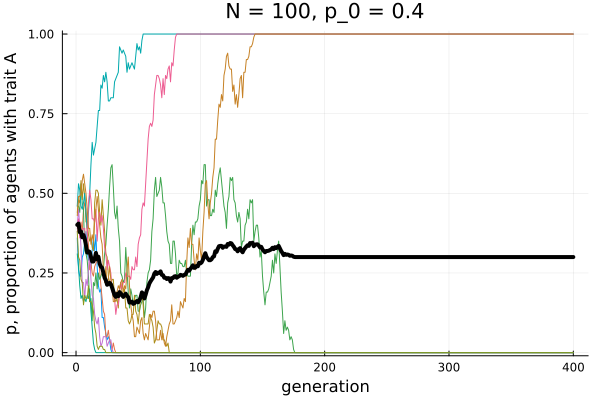

In [3]:
run(N = 10^2, r_max = 10, t_max = 400, p_0 = 0.4)

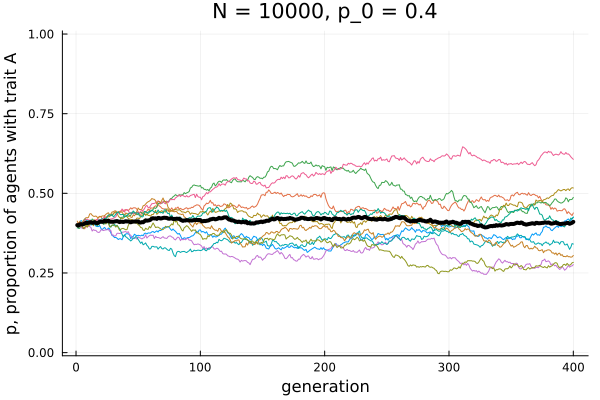

In [4]:
run(N = 10^4, r_max = 10, t_max = 400, p_0 = 0.4)